<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning3/blob/master/notebook/chap08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U keras --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.9 MB/s eta 0:00:00


# 第8章 ニューラルネットワーク



## 例題8.1

McCulloch&Pitts モデルのユニット1つを用いて，重みを適切に設定することで OR 関数を実現してください．

In [1]:
# 8章で用いるライブラリ
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

In [2]:
def unit(X, w):
    h = X @ w.T
    if h > 0:
        return 1
    else:
        return 0

# OR関数の真理値表
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
w = np.array([-0.5, 1, 1])
for x in X:
    print(x, unit(np.insert(x, 0, 1), w))

[0 0] 0
[0 1] 1
[1 0] 1
[1 1] 1


In [3]:
# AND関数の真理値表
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
w = np.array([-1.5, 1, 1])
print('AND')
for x in X:
    print(x, unit(np.insert(x, 0, 1), w))

# NOT関数の真理値表
X = np.array([[0, 0], [1, 1]])
w = np.array([0.5, -1, 0])
print('NOT')
for x in X:
    print(x, unit(np.insert(x, 0, 1), w))

AND
[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1
NOT
[0 0] 1
[1 1] 0


### 例題8.2

keras を用いて2層のフィードフォワード型ニューラルネットワークを構成し、MNIST データの識別と評価を行ってください。

## データの読み込み

MNISTデータは手描き数字画像認識のためのデータセットです。学習用60000事例、評価用10000事例で、それぞれ28x28の行列で画像が表現されています。

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
num_classes = np.unique(y_train).size  # 10
input_shape = X_train.shape[1:]        # (28, 28)

認識対象の数字画像を表示

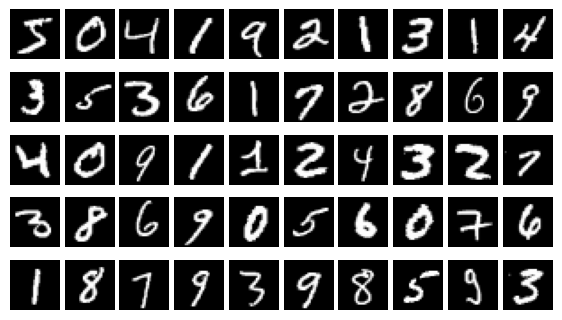

In [6]:
fig, axes = plt.subplots(5, 10, figsize=(7, 4))
axes = axes.ravel()

for i in range(50):  # 5行10列の50個の画像を表示
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('s.svg', format='svg', bbox_inches='tight')
plt.show()

入力値のとりうる範囲を0-255から0-1に変換します。

In [7]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

正解をone-hotベクトルに変換します。

In [8]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## ニューラルネットワークの構造と学習時のハイパーパラメータの設定

3層のフィードフォワード型ネットワークで学習します。

*   入力層は28x28の2次元画像を784次元の1次元ベクトルに変換 (Flatten)します
*   中間層は128個のユニットで、活性化関数はReLUです
*   出力層のユニット数はクラス数に合わせて10個で、活性化関数はすべての出力値の合計が1になるようにしたsoftmax関数です



In [9]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes,  activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

損失関数と最適化器を指定します。metricsは学習時に表示される数値で、学習が進んでいることを確認できるように設定します。

In [10]:
batch_size = 200
epochs = 3
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

ミニバッチのサイズと、繰り返し数を指定して学習を行います。

In [11]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)

評価用データで評価します。

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.142
Test accuracy: 0.958


## 演習問題 8.1

活性化関数sigmoid、最適化器sgd（最急勾配法）で多階層ネットワークを構成し、勾配消失のために学習が進まないことを確認してください。次に、活性化関数を変更して、学習がうまくできることを確認してください。余力があれば、最適化器入れ替えの効果についても確認してください。


### 解答例


## ニューラルネットワークの構造と学習時のハイパーパラメータの設定

5層のフィードフォワード型ネットワークで学習します。

In [26]:
af = 'sigmoid'
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(10,  activation='softmax')
])
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,306 (591.04 KB)

 Trainable params: 151,306 (591.04 KB)

 Non-trainable params: 0 (0.00 B)

損失関数と最適化器を指定します。metricsは学習時に表示される数値で、学習が進んでいることを確認できるように設定します。

In [27]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

ミニバッチのサイズと、繰り返し数を指定して学習を行います。lossやaccがほとんど変化しないことを確認してください。

In [28]:
model2.fit(X_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.1121 - loss: 2.3219
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1121 - loss: 2.3015
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1121 - loss: 2.3014
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1121 - loss: 2.3012
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1121 - loss: 2.3011


評価用データで評価します。

In [29]:
score = model2.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.1135 - loss: 2.3005
Accuracy: 0.113


10クラス問題で正解率が11%程度なので、まったく学習ができていないことがわかります。

活性化関数を変更します。学習が進んでいる様子を確認してください。

In [30]:
af = 'relu'

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(10,  activation='softmax')
])

In [31]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [32]:
model2.fit(X_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5267 - loss: 1.8490
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8107 - loss: 0.6945
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8723 - loss: 0.4508
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8955 - loss: 0.3682
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9076 - loss: 0.3251


In [33]:
score = model2.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9154 - loss: 0.2950
Accuracy: 0.92


もとのネットワークで、最適化器のみ変更してみます。

In [34]:
af = 'sigmoid'
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(128, activation=af),
    keras.layers.Dense(10,  activation='softmax')
])

In [35]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [36]:
model3.fit(X_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.6177 - loss: 1.2487
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9058 - loss: 0.3484
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9358 - loss: 0.2313
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9509 - loss: 0.1723
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9602 - loss: 0.1384


In [37]:
score = model3.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.3}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9592 - loss: 0.1449
Accuracy: 0.959


活性化関数や最適化手法を変更することで，勾配消失の影響を軽減し，学習が進むことが確認できています．